# Which Prepaid Plan is Better?

You work as an analyst at a telecommunications operator company called Megaline. The company offers its clients two types of prepaid plans, namely the Surf plan and the Ultimate plan. The advertising department wants to know which prepaid plan generates more revenue, so they can create an advertising budget accordingly.

You will conduct an initial analysis of the prepaid plans based on a relatively small sample of clients. You have 500 Megaline client data, which contains information such as: who they are, where they come from, what type of package they use, and the number of calls and messages they sent in 2018. Your task is to analyze the behavior of the users, then determine the package Which prepaid is more profitable?

## Daftar Isi

* [Introduksi](#introduksi)
* [Inisialisasi](#inisialisasi)
* [Memuat Data](#memuat-data)
* [Mempersiapkan Data](#mempersiapkan-data)
    * [Paket Prabayar](#paket-prabayar)
        * [Memperbaiki Data pada dataframe data_plan](#memperbaiki-data-pada-dataframe-data_plan)
        * [Memperkaya Kualitas Data pada dataframe data_plan](#memperkaya-kualitas-data-pada-dataframe-data_plan)
    * [Pengguna](#pengguna)
        * [Memperbaiki Data pada dataframe data_user](#memperbaiki-data-pada-dataframe-data_user)
        * [Memperkaya Kualitas Data pada dataframe data_user](#memperkaya-kualitas-data-pada-dataframe-data_user)
    * [Panggilan](#panggilan)
        * [Memperbaiki Data pada dataframe data_call](#memperbaiki-data-pada-dataframe-data_call)
        * [Memperkaya Kualitas Data pada dataframe data_call](#memperkaya-kualitas-data-pada-dataframe-data_call)
    * [Pesan/SMS](#pesansms)
        * [Memperbaiki Data pada dataframe data_message](#memperbaiki-data-pada-dataframe-data_message)
        * [Memperkaya Kualitas Data pada dataframe data_message](#memperkaya-kualitas-data-pada-dataframe-data_message)
    * [Internet](#internet)
        * [Memperbaiki Data pada dataframe data_internet](#memperbaiki-data-pada-dataframe-data_internet)
        * [Memperkaya Kualitas Data pada dataframe data_internet](#memperkaya-kualitas-data-pada-dataframe-data_internet)
* [Mempelajari Syarat dan Kondisi Terkait Paket Prabayar](#mempelajari-syarat-dan-kondisi-terkait-paket-prabayar)
* [Mengagregasi Data per Pengguna](#mengagregasi-data-per-pengguna)
* [Mempelajari Perilaku Pengguna](#mempelajari-perilaku-pengguna)
    * [Pengguna terhadap Panggilan](#pengguna-terhadap-panggilan)
    * [Pengguna terhadap Pesan/SMS](#pengguna-terhadap-pesansms)
    * [Pengguna terhadap Internet](#pengguna-terhadap-internet)
* [Pendapatan](#pendapatan)
* [Menguji Hipotesis Statistik](#menguji-hipotesis-statistik)
    * [Pendapatan rata-rata Pengguna Paket berbeda](#pendapatan-rata-rata-dari-pengguna-paket-prabayar-ultimate-dan-surf-berbeda)
    * [Pendapatan rata-rata Pengguna di Wilayah NY-NJ berbeda](#pendapatan-rata-rata-dari-pengguna-di-wilayah-ny-nj-berbeda-dengan-pendapatan-pengguna-dari-wilayah-lain)
* [Kesimpulan Umum](#kesimpulan-umum)


## Introduction

In the world of telecommunications that increasingly dominates our daily lives, the question that often arises is, "Which prepaid plan is actually more profitable?" Here, I will answer this question with the help of data. As an analyst at Megaline, a leading telecom operator, my job is to provide an initial look at the prepaid plans offered by this company: Surf and Ultimate. Advertising departments want to know which packages are more profitable, so they can allocate advertising budgets more intelligently.

The data we have is information about 500 Megaline clients. This data includes who they are, where they are from, what plan they chose, and how often they called and texted during 2018. I will explore this user behavior to identify the most profitable plans for Megaline.

In this project, I will explore the data with a human approach and explain my steps simply. First of all, I'll check the data and make sure everything is in the right format. Next, I'll dig into the data to quantify user behavior, including call duration, text messages, and mobile data usage. After that, I will do a comparison between the Surf and Ultimate packages to determine which one is more profitable. In other words, let's set out on this journey to find answers that can help Megaline in making strategic decisions.

## Initialization

Import the library that will be used

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Import Data

In [2]:
try:
    # Try loading the file from your laptop path
    data_call = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_calls.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_call = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_calls.csv')

In [3]:
try:
    # Try loading the file from your laptop path
    data_internet = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_internet.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_internet = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_internet.csv')

In [4]:
try:
    # Try loading the file from your laptop path
    data_message = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_messages.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_message = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_messages.csv')

In [5]:
try:
    # Try loading the file from your laptop path
    data_plan = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_plans.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_plan = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_plans.csv')

In [6]:
try:
    # Try loading the file from your laptop path
    data_user = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_users.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_user = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/4. Megaline Telecom Plan Profitability Analysis/megaline_users.csv')

In [2]:
data_call =  pd.read_csv('/datasets/megaline_calls.csv')
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_message = pd.read_csv('/datasets/megaline_messages.csv')
data_plan = pd.read_csv('/datasets/megaline_plans.csv')
data_user = pd.read_csv('/datasets/megaline_users.csv')


## Data Preparation

After all the data has been imported, you can see that there are 5 data that will be used in the analysis. Therefore, this data needs to be seen and checked first before being used in analysis.

### Prepaid Plan

In [7]:
data_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
data_plan.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


In [9]:
data_plan.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

The "Prepaid Packages" (Data Plan) table contains information about two types of prepaid packages offered by Megaline, namely "Surf" and "Ultimate". Each package has attributes, such as the number of messages, megabytes of data, included calling minutes, monthly fees, as well as additional prices if the package allocation exceeds. After looking at this information, we found no issues with missing data or inappropriate data types. In other words, the data in this table appears to be in good condition and does not require further improvement. This means we can continue the analysis without constraints on this data.

### Handle `data_plan` Data

Even though the data is in good condition, it can be seen that the prices in the column above are not all in the `float` type, but rather in the `int` type. Even with the same numerical values, it would be better for the column used to hold price information to use the `float` data type to be able to hold fractional or comma values.

In [10]:
data_plan['usd_monthly_pay'] = data_plan['usd_monthly_pay'].astype(float)
data_plan['usd_per_gb'] = data_plan['usd_per_gb'].astype(float)

In [11]:
data_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


### Enhance Quality Data `data_plan`

In [12]:
data_plan['usd_per_call'] = data_plan['usd_monthly_pay'] / data_plan['minutes_included']

In [13]:
data_plan.info()
data_plan.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   usd_per_call           2 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_call
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,0.023333
0,50,15360,500,20.0,10.0,0.03,0.03,surf,0.040000


The `usd_per_call` column can hold call costs based on the total monthly cost of the package divided by the number of minutes earned from that package.

## User

In [14]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
data_user.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaN
458,1458,Joella,Munoz,32,"Detroit-Warren-Dearborn, MI MSA",2018-07-24,ultimate,NaN
444,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,NaN
201,1201,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-04,surf,NaN
287,1287,Heide,Gill,74,"Sacramento–Roseville–Folsom, CA MSA",2018-03-15,surf,NaN


In [16]:
data_user.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In the user data frame, it can be seen that the `churn_date` column has many null values, this shows that most users are still active. The data in this column displays the date when the user stopped using the service. The `NaN` value in this column can be corrected, however, it would be better to leave the `NaN` value. 
The data type used by the data frame user also has several columns that are not appropriate, such as the `reg_date` and `churn_date` columns which use the `object`(String) data type. These 2 columns can be changed to type `datetime`.

Then in the City column, it would be more appropriate if the column was transformed into several parts, into `city_name` and `state` based on the commas ','.

### Handle `data_user` Data

Changed the data type of `reg_date` and `churn_date` columns to datetime.

In [17]:
data_user['reg_date'] = pd.to_datetime(data_user['reg_date'])
data_user['churn_date'] = pd.to_datetime(data_user['churn_date'])

### Enhance Quality Data `data_user`

Added new columns from the `city` column, to `city_name` and `state`.

In [18]:
data_user[['city_name', 'state']] = data_user['city'].str.split(', ', expand=True)

Divide the `reg_date` column into 3 parts, year, month and day.

In [19]:
data_user['reg_year'] = data_user['reg_date'].dt.year
data_user['reg_month'] = data_user['reg_date'].dt.month
data_user['reg_day'] = data_user['reg_date'].dt.day

In [20]:
data_user.info()
data_user.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   city_name   500 non-null    object        
 9   state       500 non-null    object        
 10  reg_year    500 non-null    int32         
 11  reg_month   500 non-null    int32         
 12  reg_day     500 non-null    int32         
dtypes: datetime64[ns](2), int32(3), int64(2), object(6)
memory usage: 45.0+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,city_name,state,reg_year,reg_month,reg_day
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,NaT,Portland-Vancouver-Hillsboro,OR-WA MSA,2018,6,9
179,1179,Darcey,Baird,22,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaT,Dallas-Fort Worth-Arlington,TX MSA,2018,4,27
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,NaT,Nashville-Davidson–Murfreesboro–Franklin,TN MSA,2018,12,17
255,1255,Kennith,Rowland,22,"Oklahoma City, OK MSA",2018-08-01,ultimate,NaT,Oklahoma City,OK MSA,2018,8,1
223,1223,Patience,Wilson,37,"Phoenix-Mesa-Chandler, AZ MSA",2018-07-05,surf,NaT,Phoenix-Mesa-Chandler,AZ MSA,2018,7,5


## Call

In [21]:
data_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
data_call.sample(5)

,id,user_id,call_date,duration
108620,1383_309,1383,2018-11-06,4.28
49169,1177_205,1177,2018-11-22,0.00
30450,1114_255,1114,2018-12-06,6.97
20837,1077_804,1077,2018-07-18,3.95
106386,1376_68,1376,2018-12-09,4.61


In [23]:
data_call.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In the data_call data frame, you can see that there are 4 columns containing call ID, user ID, call date and call duration. Even though the data already looks neat. There are also several types of data types that do not match the columns, such as the `call_date` column using the `object` (String) data type. This column is more suitable for using the `datetime` data type.

### Handle `data_call` Data

Changed the data type of the `call_date` column to datetime.

In [24]:
data_call['call_date'] = pd.to_datetime(data_call['call_date'])

In [25]:
data_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enhance Quality `data_call` Data.

Divide the `call_date` column into 3 parts, year, month, and day.

In [26]:
data_call['call_year'] = data_call['call_date'].dt.year
data_call['call_month'] = data_call['call_date'].dt.month
data_call['call_day'] = data_call['call_date'].dt.day

In [27]:
data_call.info()
data_call.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   call_year   137735 non-null  int32         
 5   call_month  137735 non-null  int32         
 6   call_day    137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(1)
memory usage: 5.8+ MB


,id,user_id,call_date,duration,call_year,call_month,call_day
116971,1408_620,1408,2018-06-08,3.91,2018,6,8
69003,1247_336,1247,2018-07-31,4.38,2018,7,31
133712,1483_587,1483,2018-05-18,6.36,2018,5,18
132769,1478_223,1478,2018-11-28,0.00,2018,11,28
73901,1261_687,1261,2018-12-11,11.73,2018,12,11


## Message

In [28]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
data_message.sample(5)

,id,user_id,message_date
19564,1126_283,1126,2018-07-24
14327,1098_357,1098,2018-09-19
48554,1326_91,1326,2018-09-04
4606,1043_1019,1043,2018-06-29
15872,1105_71,1105,2018-12-23


In [30]:
data_message.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In the data_message data frame, there is data that can be said to be neat, although it can be seen that there are columns with inappropriate data types, such as the `message_date` column which uses the `object` (string) data type.

### Handle `data_message` Data

Changed the data type of the `message_date` column to datetime.

In [31]:
data_message['message_date'] = pd.to_datetime(data_message['message_date'])

In [32]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enhance Quality Data `data_message`

Divide the `message_date` column into 3 parts, year, month, and day

In [33]:
data_message['message_year'] = data_message['message_date'].dt.year
data_message['message_month'] = data_message['message_date'].dt.month
data_message['message_day'] = data_message['message_date'].dt.day

In [34]:
data_message.info()
data_message.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_year   76051 non-null  int32         
 4   message_month  76051 non-null  int32         
 5   message_day    76051 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 2.6+ MB


,id,user_id,message_date,message_year,message_month,message_day
25079,1148_79,1148,2018-12-09,2018,12,9
8160,1061_166,1061,2018-07-08,2018,7,8
2480,1028_396,1028,2018-04-09,2018,4,9
60378,1381_491,1381,2018-10-04,2018,10,4
17320,1114_159,1114,2018-11-12,2018,11,12


## Internet

In [35]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [36]:
data_internet.sample(5)

,id,user_id,session_date,mb_used
7093,1039_368,1039,2018-11-25,369.45
47015,1210_94,1210,2018-06-19,351.93
89036,1410_166,1410,2018-12-22,449.53
67442,1313_116,1313,2018-11-22,189.01
3536,1020_129,1020,2018-11-26,595.09


In [37]:
data_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In the data_internet data frame, you can see that there are 4 columns, where the columns look clean and can be used. However, the `session_date` column uses the `object` (string) data type, where it is more suitable to use the `datetime` data type.

### Handle `data_internet` Data

Change the data type `session_date` to datatime.

In [38]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])

In [39]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enhance Quality Data `data_internet`

Divide the `session_date` column into 3 parts, year, month, and day

In [40]:
data_internet['session_year'] = data_internet['session_date'].dt.year
data_internet['session_month'] = data_internet['session_date'].dt.month
data_internet['session_day'] = data_internet['session_date'].dt.day

In [41]:
data_internet.info()
data_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   session_year   104825 non-null  int32         
 5   session_month  104825 non-null  int32         
 6   session_day    104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(1)
memory usage: 4.4+ MB


,id,user_id,session_date,mb_used,session_year,session_month,session_day
6762,1039_37,1039,2018-11-02,80.12,2018,11,2
48751,1217_91,1217,2018-10-16,354.19,2018,10,16
90591,1417_192,1417,2018-11-26,618.45,2018,11,26
40115,1181_256,1181,2018-05-13,414.75,2018,5,13
5690,1031_270,1031,2018-12-18,0.00,2018,12,18


## Terms and Conditions of Prepaid Packages Understanding

In [38]:
data_plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_call
0,50,15360,500,20.0,10.0,0.03,0.03,surf,0.040000
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,0.023333


**Surf Package**

The "Surf" plan offers customers 50 messages, 15,360 megabytes of data, and 500 calling minutes per month for a monthly fee of 20. Customers on the Surf plan will be charged an additional 0.03 for each message and call minute that exceeds the monthly allocation, as well as 10.00 for each gigabytes of data used exceed allocation.

**Ultimate Package**

Meanwhile, the "Ultimate" plan offers a larger allocation, with 1,000 messages, 30,720 megabytes of data, and 3,000 calling minutes per month. The monthly fee is 70. This plan also charges an additional fee of 0.01 for each message and call minute that exceeds the allocation, as well as 7.00 for each gigabyte of data used that exceeds the monthly allocation.

## Aggregate Data per User

Count the number of calls made by each user per month.

In [42]:
calls_per_month = data_call.groupby(['user_id', 'call_month']).agg({'duration': 'sum'}).reset_index()
calls_per_month.columns = ['user_id', 'month', 'total_minutes']

Calculate the number of minutes each user spends on calls per month.

In [43]:
messages_per_month = data_message.groupby(['user_id', 'message_month']).size().reset_index(name='total_messages')
messages_per_month.columns = ['user_id', 'month', 'total_messages']

Count the number of SMS sent by each user per month.

In [44]:
internet_per_month = data_internet.groupby(['user_id', 'session_month']).agg({'mb_used': 'sum'}).reset_index()
internet_per_month.columns = ['user_id', 'month', 'total_data_mb']

Calculate the volume of internet traffic used by each user per month.

In [45]:
merged_data = calls_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(internet_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.fillna(0)

Integrating call, minute, SMS and internet data based on user_id and month.

In [46]:
user_data = merged_data.merge(data_user[['user_id', 'plan']], on='user_id', how='outer')

Add the prepaid plan information.

In [47]:
user_data = user_data.merge(data_plan[['plan_name', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']], left_on='plan', right_on='plan_name', how='outer')

Calculate monthly revenue for each user.

In [48]:
user_data['revenue'] = user_data.apply(lambda row: max(0, (row['total_minutes'] - row['minutes_included']) * row   ['usd_per_minute']) + max(0, (row['total_messages'] - row['messages_included']) * row['usd_per_message']) + max(0, (row['total_data_mb'] - row['mb_per_month_included']) / 1024 * row['usd_per_gb']) + row['usd_monthly_pay'], axis=1)

In [49]:
user_data = user_data[['user_id', 'month', 'plan', 'total_minutes', 'total_messages', 'total_data_mb', 'revenue']]

Checking the `user_data` dataframe.

In [50]:
user_data.sample(20)

,user_id,month,plan,total_minutes,total_messages,total_data_mb,revenue
636,1189,10.0,surf,474.55,52.0,21811.18,83.059805
855,1261,10.0,surf,566.37,57.0,17573.63,43.818580
688,1206,11.0,surf,296.67,28.0,22740.44,92.074609
2265,1467,12.0,ultimate,459.35,77.0,18368.02,70.000000
17,1005,12.0,surf,470.22,11.0,17140.17,37.384473
1429,1439,9.0,surf,285.14,67.0,12222.24,20.510000
714,1216,12.0,surf,355.20,0.0,15687.82,23.201367
55,1018,12.0,surf,447.90,8.0,17390.55,39.829590
428,1131,6.0,surf,0.00,27.0,14637.04,20.000000
1703,1069,10.0,ultimate,510.03,119.0,11498.07,70.000000


## Understanding User Behavior

### User based on Call

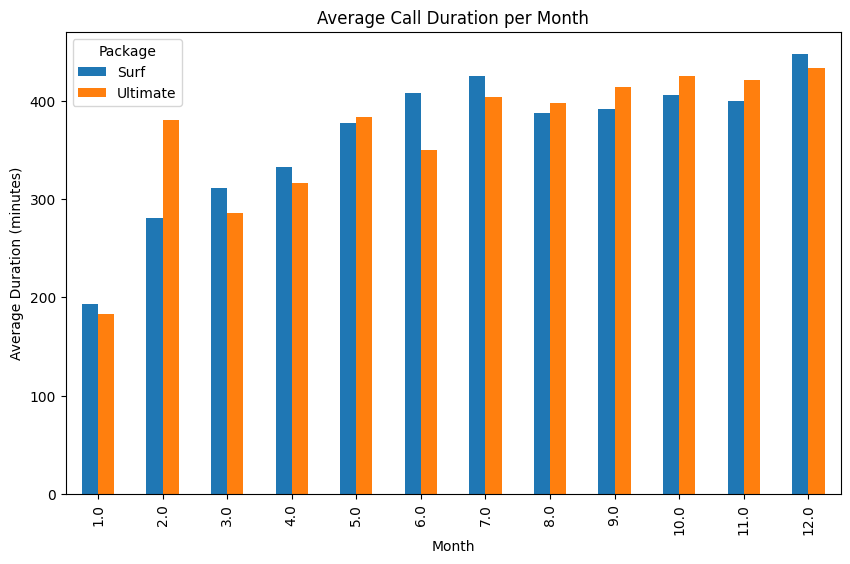

In [51]:
call_duration_avg = user_data.groupby(['month', 'plan'])['total_minutes'].mean().unstack()
call_duration_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Call Duration per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Package', labels=['Surf', 'Ultimate'])
plt.show()

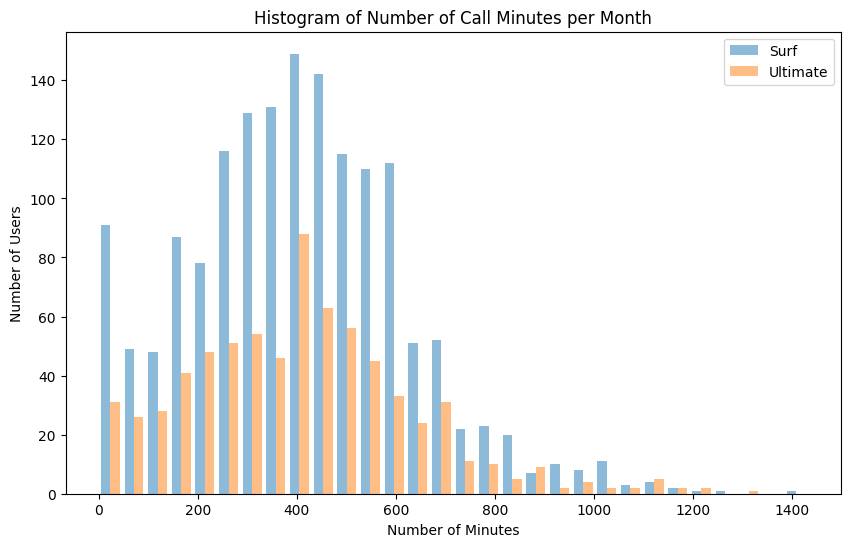

In [52]:
surf_duration = user_data[user_data['plan'] == 'surf']['total_minutes']
ultimate_duration = user_data[user_data['plan'] == 'ultimate']['total_minutes']
plt.figure(figsize=(10, 6))

plt.hist([surf_duration, ultimate_duration], bins=30, alpha=0.5, label=['Surf', 'Ultimate'])
plt.title('Histogram of Number of Call Minutes per Month')
plt.xlabel('Number of Minutes')
plt.ylabel('Number of Users')
plt.legend()

In [53]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
call_duration_stats = user_data.groupby(['plan', 'month'])['total_minutes'].agg(['mean', 'var'])
print(call_duration_stats)

                      mean           var
plan     month                          
surf     1.0    192.840000  14795.440200
         2.0    280.851111  46959.219961
         3.0    310.970000  31821.317991
         4.0    332.380000  45615.666796
         5.0    377.053247  53282.922217
         6.0    407.208866  40758.661193
         7.0    424.523223  54434.184064
         8.0    387.169630  48616.061790
         9.0    390.992062  41580.494645
         10.0   405.692363  46731.430317
         11.0   399.599823  46105.085924
         12.0   447.475283  56983.247423
ultimate 1.0    183.162500  14991.369958
         2.0    379.861429  68540.288348
         3.0    285.701667  54273.917252
         4.0    316.508095  31057.727496
         5.0    383.664828  39290.610940
         6.0    349.811064  37923.360514
         7.0    403.767288  64844.426958
         8.0    397.274789  47680.189425
         9.0    413.287326  50994.505514
         10.0   425.168019  48371.222127
         11.0   

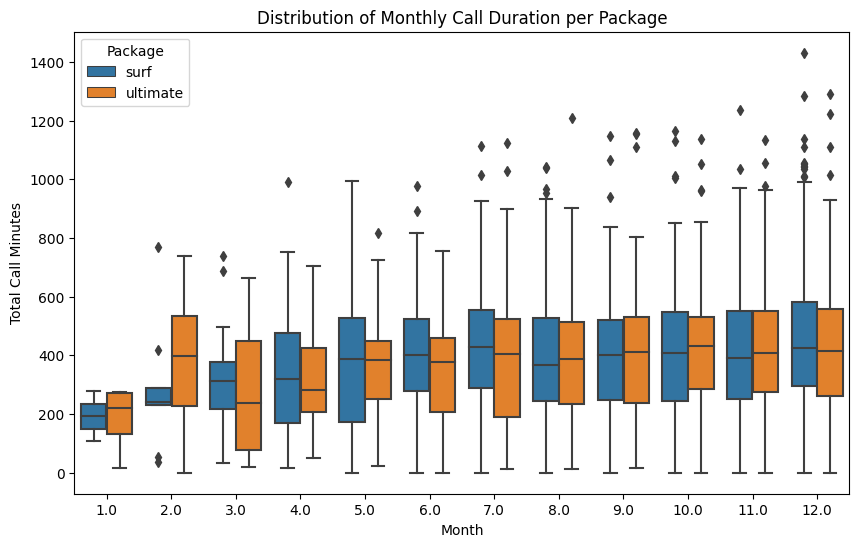

In [54]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='total_minutes', hue='plan', data=user_data)
plt.title('Distribution of Monthly Call Duration per Package')
plt.xlabel('Month')
plt.ylabel('Total Call Minutes')
plt.legend(title='Package')
plt.show()

Based on the data that has been analyzed, there are differences in user behavior in making calls between the Surf and Ultimate packages. Most Surf plan users tend to have a higher average monthly call duration than Ultimate plan users, especially in months such as October to December. Apart from that, the variation in monthly call duration also shows the difference between the two packages, where Surf package users have a higher variation than Ultimate package users. However, the average monthly call duration of Ultimate package users looks stable compared to Surf package users who have more significant monthly call duration fluctuations. This shows that the call usage behavior has quite significant differences between the two packages.

### User based on Messages

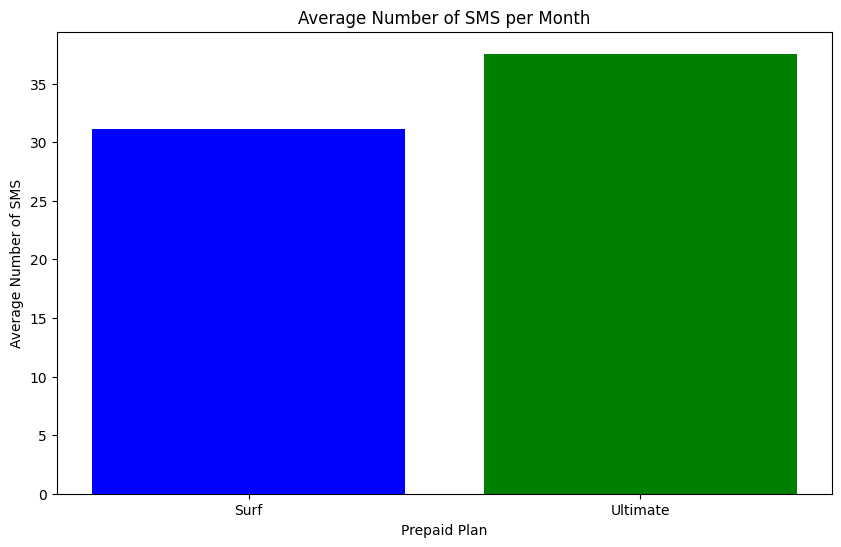

In [55]:
surf_sms_mean = user_data[user_data['plan'] == 'surf']['total_messages'].mean()
ultimate_sms_mean = user_data[user_data['plan'] == 'ultimate']['total_messages'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Surf', 'Ultimate'], [surf_sms_mean, ultimate_sms_mean], color=['blue', 'green'])
plt.title('Average Number of SMS per Month')
plt.xlabel('Prepaid Plan')
plt.ylabel('Average Number of SMS')
plt.show()

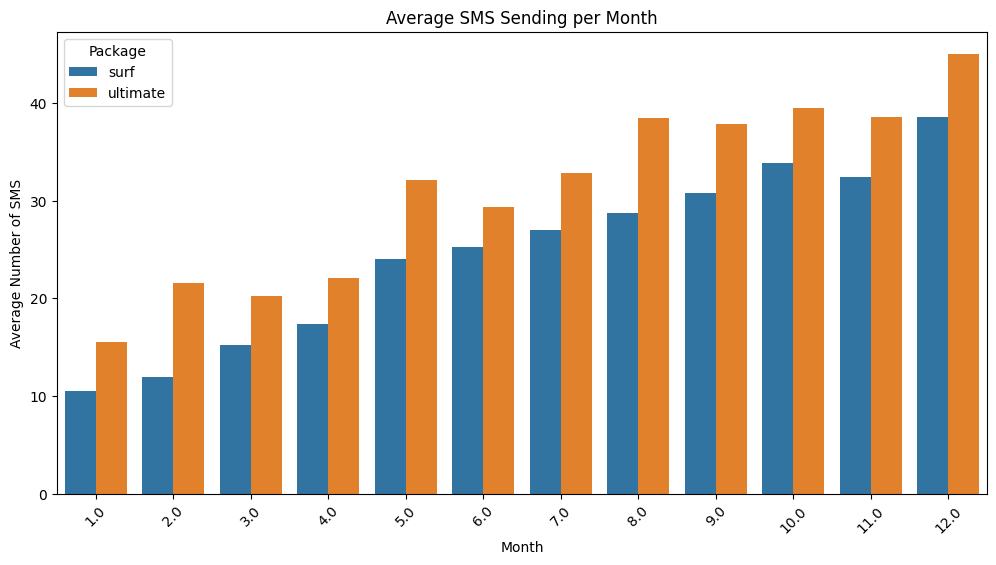

In [56]:
sms_and_plan_data = user_data.merge(data_plan[['plan_name', 'usd_per_message']], left_on='plan', right_on='plan_name', how='left')

sms_by_month = sms_and_plan_data.groupby(['month', 'plan_name'])['total_messages'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_messages', hue='plan_name', data=sms_by_month)
plt.xlabel('Month')
plt.ylabel('Average Number of SMS')
plt.title('Average SMS Sending per Month')
plt.xticks(rotation=45)
plt.legend(title='Package')
plt.show()

In [57]:
sms_statistics = user_data.groupby(['plan', 'month'])['total_messages'].agg(['mean', 'var'])

sms_statistics

mean          var
plan     month                        
surf     1.0    10.500000   220.500000
         2.0    12.000000   386.000000
         3.0    15.260870   346.565217
         4.0    17.400000   501.591837
         5.0    24.012987   847.197198
         6.0    25.298969   914.920103
         7.0    27.033058   923.915565
         8.0    28.777778  1029.515528
         9.0    30.762887  1003.829496
         10.0   33.839662  1275.465708
         11.0   32.385159  1065.344034
         12.0   38.600629  1458.158612
ultimate 1.0    15.500000   313.666667
         2.0    21.571429   478.285714
         3.0    20.250000   654.386364
         4.0    22.047619   544.147619
         5.0    32.103448  1297.310345
         6.0    29.340426   857.620722
         7.0    32.830508   960.488019
         8.0    38.478873  1196.367404
         9.0    37.895349  1050.918331
         10.0   39.443396  1221.106289
         11.0   38.606299  1232.669166
         12.0   45.006623  1549.419956

Based on statistical data on sending messages on the Surf and Ultimate packages per month, it can be seen that the average message sending on the Ultimate package tends to be higher than on the Surf package throughout the year. The variance also shows that the messages in the Ultimate package have relatively greater variations compared to the Surf package. This illustrates that Ultimate package users are more active in sending messages, while Surf package users tend to be less active in sending messages. However, messaging patterns from both packages have increased throughout the year.

### User based on Internet

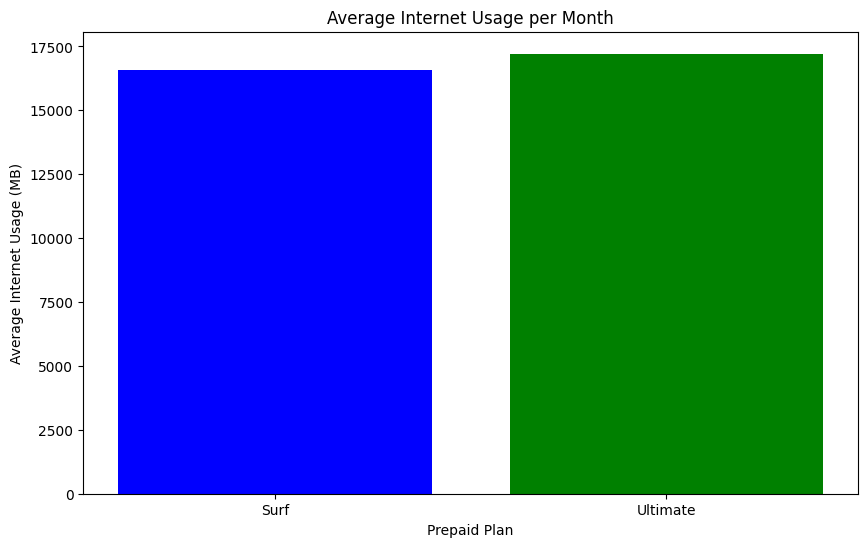

In [58]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
surf_net_mean = user_data[user_data['plan'] == 'surf']['total_data_mb'].mean()
ultimate_net_mean = user_data[user_data['plan'] == 'ultimate']['total_data_mb'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Surf', 'Ultimate'], [surf_net_mean, ultimate_net_mean], color=['blue', 'green'])
plt.title('Average Internet Usage per Month')
plt.xlabel('Prepaid Plan')
plt.ylabel('Average Internet Usage (MB)')
plt.show()

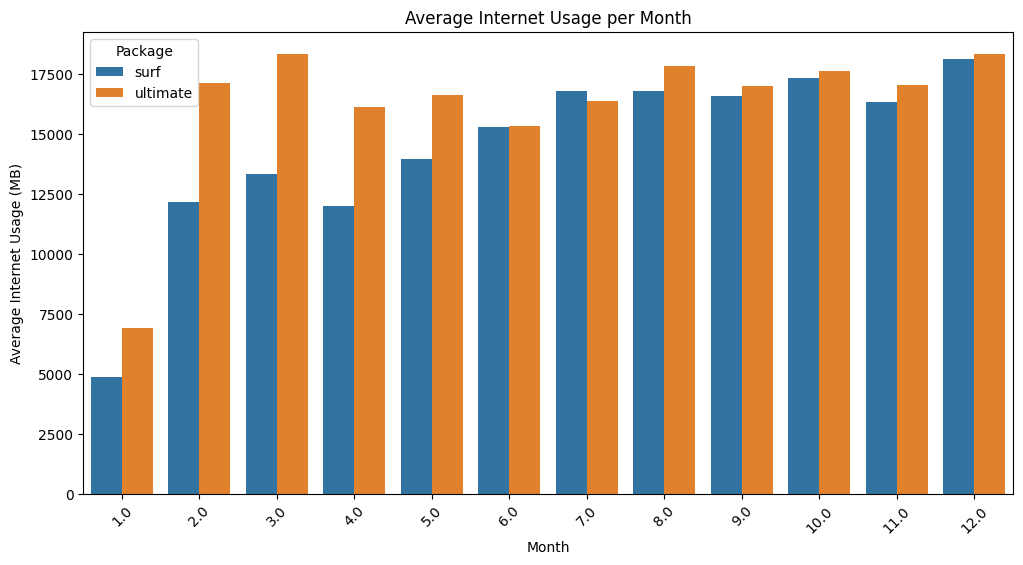

In [59]:
internet_by_month = user_data.groupby(['month', 'plan'])['total_data_mb'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_data_mb', hue='plan', data=internet_by_month)
plt.xlabel('Month')
plt.ylabel('Average Internet Usage (MB)')
plt.title('Average Internet Usage per Month')
plt.xticks(rotation=45)
plt.legend(title='Package')
plt.show()

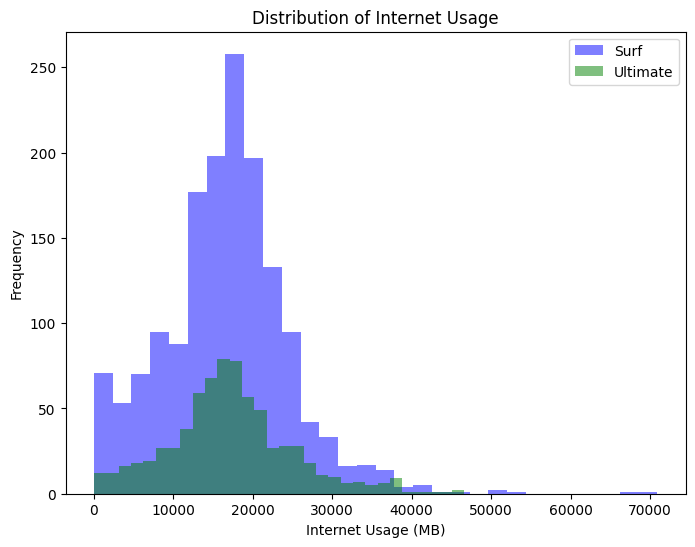

Conclusion:
Average internet usage for Surf package: 16558.283490146216 MB
Average internet usage for the Ultimate package: 17214.699694444447 MB
Median internet usage for Surf packages: 16829.31 MB
Median internet usage for the Ultimate plan: 16858.34 MB
Internet usage variance for Surf package: 64216395.838027954
Internet usage variances for the Ultimate package: 61652293.32385831


In [60]:
surf_internet_data = user_data[user_data['plan'] == 'surf']['total_data_mb']
ultimate_internet_data = user_data[user_data['plan'] == 'ultimate']['total_data_mb']

surf_mean = surf_internet_data.mean()
ultimate_mean = ultimate_internet_data.mean()

surf_median = surf_internet_data.median()
ultimate_median = ultimate_internet_data.median()

surf_variance = surf_internet_data.var()
ultimate_variance = ultimate_internet_data.var()

plt.figure(figsize=(8, 6))
plt.hist(surf_internet_data, bins=30, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_internet_data, bins=30, alpha=0.5, label='Ultimate', color='green')
plt.title('Distribution of Internet Usage')
plt.xlabel('Internet Usage (MB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Conclusion:")
print(f"Average internet usage for Surf package: {surf_mean} MB")
print(f"Average internet usage for the Ultimate package: {ultimate_mean} MB")
print(f"Median internet usage for Surf packages: {surf_median} MB")
print(f"Median internet usage for the Ultimate plan: {ultimate_median} MB")
print(f"Internet usage variance for Surf package: {surf_variance}")
print(f"Internet usage variances for the Ultimate package: {ultimate_variance}")

The average internet data usage for the Surf package is around 16,558 MB, while for the Ultimate package it is around 17,215 MB. However, the median value of the two packages is almost the same, with figures around 16,829 MB for the surf package and 16,858 MB for the ultimate package.
The variance value of the ultimate package has a lower value of around 61,652,293 compared to the variance value of the surf package with a value of 64,216,396. From this value, it can be seen that although the average internet usage tends to be different, the difference is not very significant. The almost similar median values ​​also indicate that the two package users have similar internet usage.
Despite similar statistical values, the frequency counts for surf packets dominate overall.

## Revenue

In [61]:
surf_revenue = user_data[user_data['plan'] == 'surf']['revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['revenue']

print("Surf Package Revenue Statistics:")
print(surf_revenue.describe())

print("\nUltimate Package Revenue Statistics:")
print(ultimate_revenue.describe())

surf_mean_revenue = surf_revenue.mean()
ultimate_mean_revenue = ultimate_revenue.mean()
print("\nAverage Surf Package Revenue:", surf_mean_revenue)
print("Average Ultimate Package Earnings:", ultimate_mean_revenue)

revenue_difference = ultimate_mean_revenue - surf_mean_revenue
print("Difference in Average Income: ", revenue_difference)

Surf Package Revenue Statistics:
count    1579.000000
mean       57.152072
std        53.682715
min        20.000000
25%        20.000000
50%        36.552287
75%        76.818970
max       581.328509
Name: revenue, dtype: float64

Ultimate Package Revenue Statistics:
count    724.000000
mean      72.104389
std       10.740164
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.522764
Name: revenue, dtype: float64

Average Surf Package Revenue: 57.152072411831064
Average Ultimate Package Earnings: 72.10438859633979
Difference in Average Income:  14.952316184508724


There is a quite striking difference in income between the two prepaid packages, namely Surf and Ultimate. Based on income statistics, the Surf package has an average income of 57.29, while the Ultimate package has an average income of 72.12. The average difference in income between the two is around 14.82. This shows that Ultimate plan users tend to generate higher revenues than Surf plan users. This difference could be due to the higher monthly costs in the Ultimate plan and the large number of Surf plan users who subscribe at the lower price.
However, the number of surf package users is 1573, while the ultimate package is only 720.

## Testing Statistical Hypotheses

### Average Income of Ultimate and Surf prepaid plan users is different.

Null Hypothesis: 
- The average income of Ultimate package users is the same as the average income of Surf package users.

Alternative Hypothesis: 
- The average income of Ultimate plan users is different from the average income of Surf plan users.

alpha = 0.05

In [62]:
alpha = 0.05

surf_revenue = user_data[user_data['plan'] == 'surf']['revenue']
ultimate_revenue = user_data[user_data['plan'] == 'ultimate']['revenue']


In [63]:
t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient statistical evidence that the average income of Ultimate plan users is different from the average income of Surf plan users.")
else:
    print("Not enough statistical evidence to reject the null hypothesis. The average income of Ultimate and Surf plan users does not differ significantly.")

Reject the null hypothesis. There is sufficient statistical evidence that the average income of Ultimate plan users is different from the average income of Surf plan users.


### Average Income of users in the NY-NJ region is different from the income of users from other regions.

Null Hypothesis: 

- The average income of users in the NY-NJ region is the same as the average income of users from other regions.

Alternative Hypothesis: 

- The average income of users in the NY-NJ region is different from the average income of users from other regions.

alpha = 0.05

In [64]:
location_data = pd.merge(user_data, data_user[['user_id', 'state']], on='user_id')
alpha = 0.05

ny_nj_revenue = location_data[location_data['state'].isin(['NY', 'NJ'])]['revenue']
other_revenue = location_data[~location_data['state'].isin(['NY', 'NJ'])]['revenue']

In [65]:
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient statistical evidence that the average income of users in the NY-NJ area is different from the average income of users from other areas.")
else:
    print("Not enough statistical evidence to reject the null hypothesis. The average income of users in the NY-NJ region and other regions does not differ significantly.")

Not enough statistical evidence to reject the null hypothesis. The average income of users in the NY-NJ region and other regions does not differ significantly.


## Conclusion

In the analysis of these 2 packages, there are many processes carried out before the analysis is executed. From the data we have, with a total of 5 data, the data can be said to be clean and can be directly used for analysis, but in this project, the data is cleaned in more detail and the quality of the data value is increased. This is done by changing the data type of the date column to the format `datetime` and creating an additional column to hold the date, month and year values ​​obtained from the date column which has been formatted and split.

After the data has been cleaned, the data is analyzed, especially regarding the terms and conditions of the data package. In general, there are 2 packages with the names 'surf' and 'ultimate', where each package has different benefits and costs from each other.

There is also an analysis to calculate the user's income value, which uses several values ​​processed from the 5 data. After the revenue value has been obtained, the `user_data` dataframe is created to hold the value of each user, including the income value which is stored in the 'revenue' column.

From the `user_data` dataframe, an analysis of customer behavior with calls, messages/SMS, and the internet is carried out. In this analysis, it can be said that customers with the surf package have a higher average call duration than the ultimate package. For message delivery, the average delivery value for ultimate packages can be seen to be higher than surf packages for the entire year. It can be said that customers tend to send more messages using the ultimate package. However, both packages have increased throughout the year. For internet data usage, both packages have similar median values, however, there is a slight difference in the average values ​​where the ultimate package is bigger with a value of 17,215 and 16,558 for the surf package.

For customer income analysis, there are several significant values ​​between the two packages, the average income for surf package customers is 57.29 and for ultimate package customers it is 72.11. Where customers from the ultimate package are higher at around 14.82. Even so, the number of customers using the surf package is 1573, which is more than 2x the number of ultimate package customers, which is only 720.

There is also hypothesis testing on the average value of income for the two packages and customer income from the NY-NJ area. The two hypotheses are executed using alpha = 0.05, and the two null hypotheses are that the average income value for the two packages is the same, and the average income in the NY-NJ region and other regions is the same. In this test, a T-test was carried out and the result was to reject the null hypothesis for testing whether the average income of the two packages was the same, because there was sufficient statistical evidence in the analysis. To test the hypothesis that the average income in the NY-NJ region is the same as other regions, it can be said that it cannot reject the null hypothesis, because there is not enough statistical evidence obtained and it can be said that the average income in the NY-NJ region and others is not significantly different.